In [21]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [25]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe', options=options)  # jupyter - 경로 주의

C:\Users\admin\AppData\Local\Temp\ipykernel_10972\2656350434.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)  # jupyter - 경로 주의


In [10]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [12]:
# F12해서 쭉쭉 찾아가는 경로를 xpath로 써놓은 것
# selenium 4 버전으로 변경되면서 함수 자체가 수정되었다 -> 새 패키지 추가 필요
from selenium.webdriver.common.by import By

In [17]:
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [18]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [19]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [20]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [22]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [23]:
gu_list = list(set(df_star["구"]))
gu_list

['강남구',
 '종로구',
 '성북구',
 '중랑구',
 '동대문구',
 '서초구',
 '성동구',
 '서대문구',
 '금천구',
 '관악구',
 '도봉구',
 '송파구',
 '은평구',
 '중구',
 '강동구',
 '광진구',
 '구로구',
 '마포구',
 '용산구',
 '강서구',
 '동작구',
 '노원구',
 '양천구',
 '강북구',
 '영등포구']

In [30]:
edi_url = 'https://www.ediya.com/contents/find_store.html'
driver = webdriver.Chrome('./chromedriver.exe')
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_10972\3755492516.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


In [38]:
driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys('서울 강남구')
driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

[<li class="item"><a href="#c" onclick="panLatTo('0','0','0');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남YMCA점</dt> <dd>서울 강남구 논현동</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.0401601992311','37.51654171724045','1');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남구청역아이티웨딩점</dt> <dd>서울 강남구 학동로 338 (논현동, 강남파라곤)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.02810578707652','37.51408005446769','2');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남논현학동점</dt> <dd>서울 강남구 논현로131길 28 (논현동)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.05242928262568','37.50133876179308','3');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남대치점</dt> <dd>서울 강남구 역삼로 415 (대치동, 성진빌딩)</dd></dl></a></li>,
 <li class="item"><a href="#c" onc

In [40]:
edi_info = []

for gu in gu_list:
    driver.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH,'//*[@id="keyword"]').clear
    driver.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        
        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

722

In [42]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
717,수유1동점,강북구,서울 강북구 삼양로 293 (수유동)
718,수유사거리점,강북구,"서울 강북구 덕릉로 82 (수유동, 제네스타워)"
719,수유역점,강북구,서울 강북구 도봉로 355 (수유동)
720,우이역도선사점,강북구,서울 강북구 삼양로173길 21 (우이동)
721,한신대점,강북구,서울 강북구 덕릉로 31 (수유동)


In [34]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,강남구,89
1,종로구,39
2,성북구,15
3,중랑구,7
4,동대문구,9
5,서초구,48
6,성동구,13
7,서대문구,21
8,금천구,13
9,관악구,12


In [43]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,강남구,88
1,종로구,31
2,성북구,32
3,중랑구,27
4,동대문구,25
5,서초구,29
6,성동구,23
7,서대문구,21
8,금천구,23
9,관악구,28


In [44]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,강남구,88,89,-1
1,종로구,31,39,-8
2,성북구,32,15,17
3,중랑구,27,7,20
4,동대문구,25,9,16
5,서초구,29,48,-19
6,성동구,23,13,10
7,서대문구,21,21,0
8,금천구,23,13,10
9,관악구,28,12,16


In [46]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_10972\3681494351.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [48]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmb10',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXGeneral',
 'cmex10',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'STIXSizeFiveSym',
 'cmss10',
 'DejaVu Serif',
 'cmmi10',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmr10',
 'Arial',
 'Times New Roman',
 'Matura MT Script Capitals',
 'Tempus Sans ITC',
 'Palatino Linotype',
 'Segoe UI Symbol',
 'Arial',
 'Sylfaen',
 'Calibri',
 'Gill Sans MT',
 'Wingdings',
 'Ravie',
 'Segoe MDL2 Assets',
 'Tw Cen MT',
 'Berlin Sans FB',
 'Microsoft YaHei',
 'Century Gothic',
 'Tahoma',
 'Yu Gothic',
 'Rockwell',
 'Candara',
 

In [50]:
matplotlib.rcParams['axes.unicode_minus'] = False

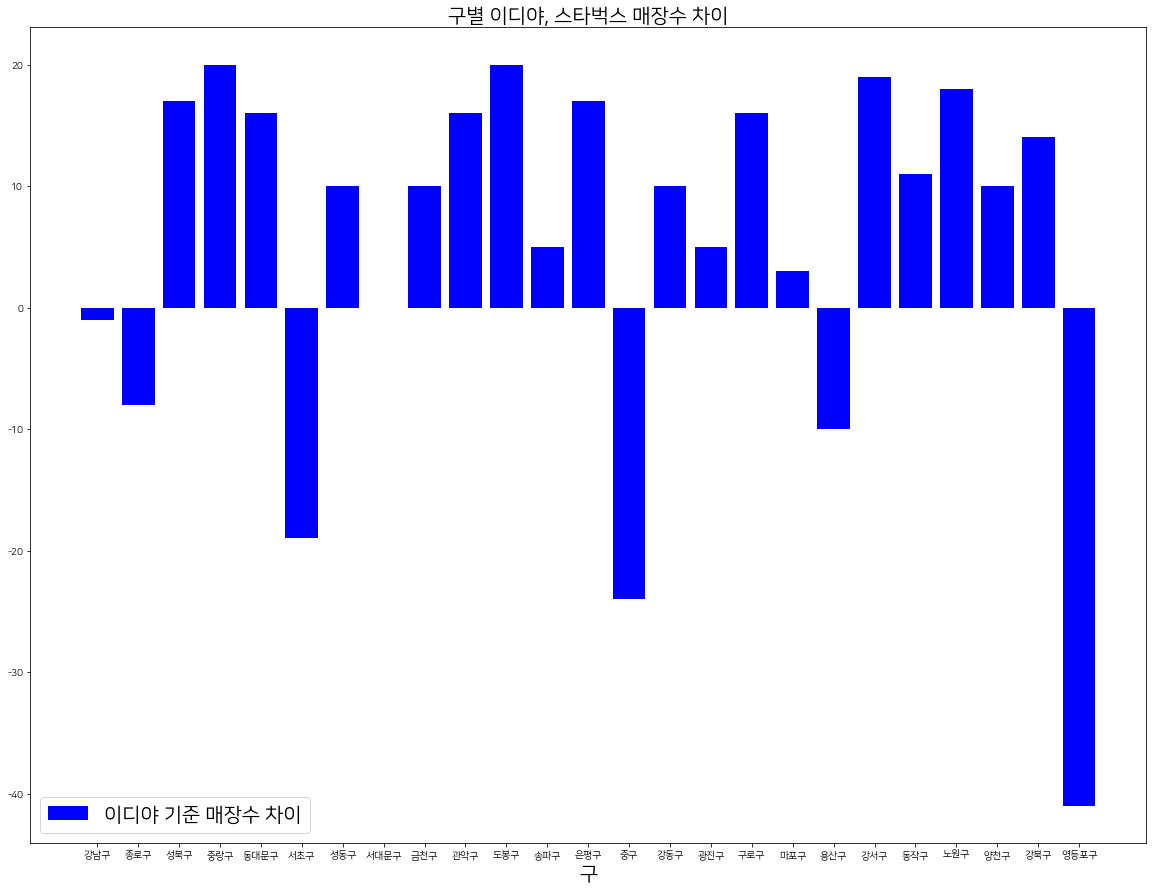

In [52]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'NanumSquare'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()